# Title

## Overview
We shall be using the CRISP DM methodology for this project
* Business Understanding

* Data Understanding

* Exploratory Data Analysis

* Modeling

* Evaluation

* Deployment

## 3. Data Preparation

### a. Import Relevant libraries for Data Analysis

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
#Inspect the first 5 rows of the dataset
health_wellness_df = pd.read_csv('Health_and_wellness\Health and Sleep relation 2024\Sleep_health_and_lifestyle_dataset.csv')
health_wellness_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [195]:
#inspect the shape of the dataset
health_wellness_df.shape

(374, 13)

In [196]:
#Inspect the column names of the dataset
health_wellness_df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [197]:
#Check the statistical data
health_wellness_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


**Observations**

* The age of the individuals ranges from 27 to 59 years old.

* The mean sleep duration hours is at 7.1 with the standard deviation of 0.8 hrs. 

* The quality of sleep ranges from 4 to 9.

* The Physical Activity Level ranges from 30 to 90. 

* The stress level ranges from 3 to 8 being the maximum.

* The highest heart rate recorded is 86.

* The minimum daily steps recorded is 3000 and the average steps taken daily is 6816.

In [198]:
#Check the Datatypes of the columns
health_wellness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Summary**

* The dataset has 374 rows and 13 columns. The datatypes are 1 float64, 7 int64 and 5 objects. Missing values can be seen on column 'Sleep Disorder' where the non-null values are 155. We shall proceed to confirm the missing values and duplicates

In [199]:
#Confirm the missing values
health_wellness_df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [200]:
health_wellness_df.duplicated().sum()

0

**Summary**

* We have 219 null values in the Sleep Disorder and we shall decide how to deal with this. 

* We also do not have any duplicated values.

In [201]:
#Check value distribution for the null values on the Sleep Disorder column
print(health_wellness_df['Sleep Disorder'].isnull().value_counts())
print('------')
print(health_wellness_df['Sleep Disorder'].value_counts(normalize=True))

Sleep Disorder
True     219
False    155
Name: count, dtype: int64
------
Sleep Disorder
Sleep Apnea    0.503226
Insomnia       0.496774
Name: proportion, dtype: float64


**Observations**

* 115 entries have sleep disorder while 219 do not have sleep disorder. We shall then proceed to have a placeholder in the place of null values. We also observe a class imbalance on the target column.

* For those with sleep disorders about 50.3% have Sleep Apnea and 49.7% have Insomnia.

In [202]:
#Fill the null values with 'No Disorder' as a placeholder
health_wellness_df['Sleep Disorder'] = health_wellness_df['Sleep Disorder'].fillna('No Disorder')
health_wellness_df['Sleep Disorder'].value_counts() #Confirmed the placeholder strings are in place


Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

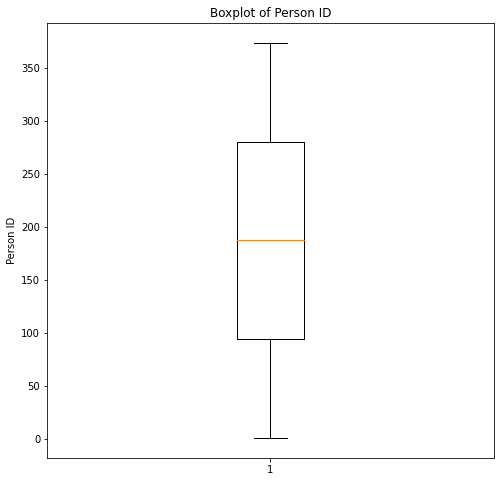

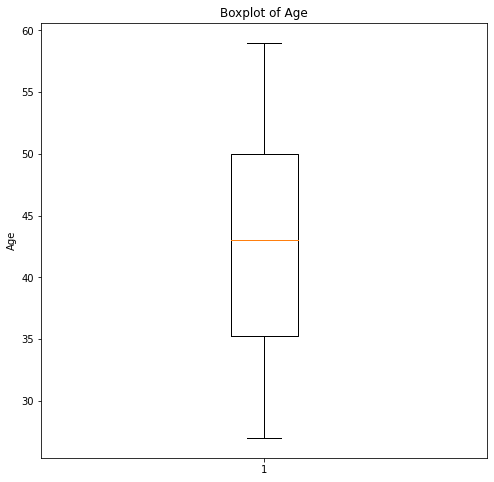

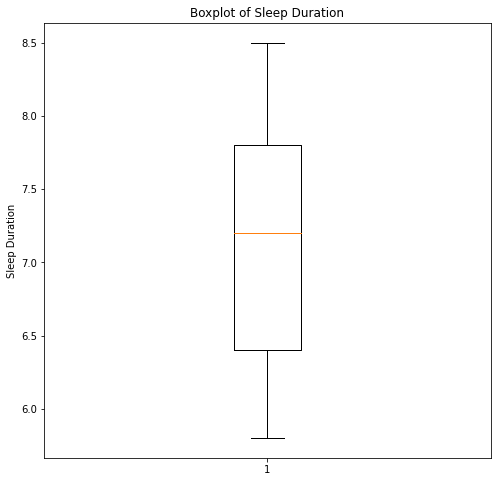

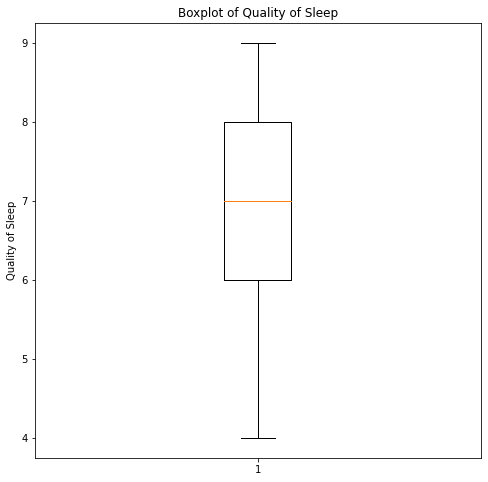

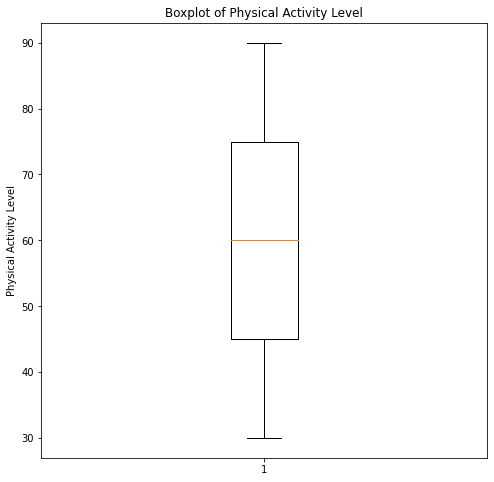

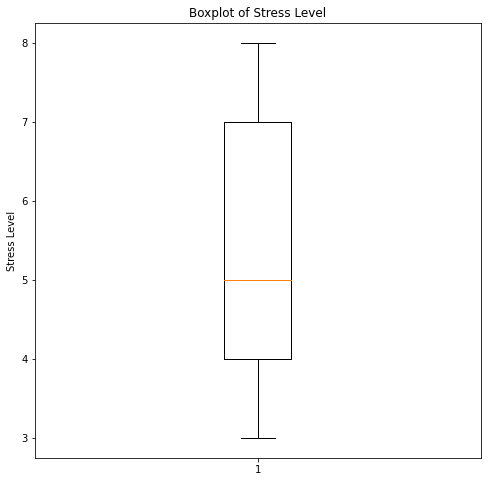

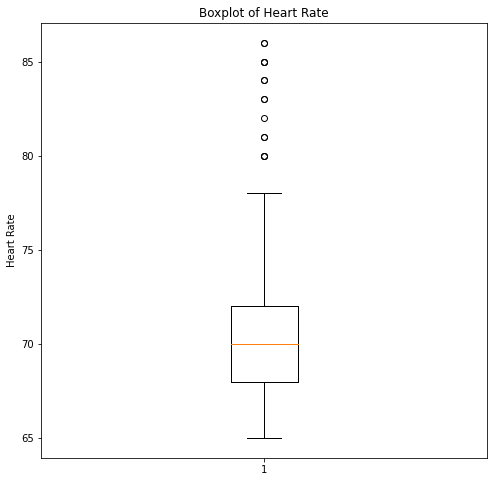

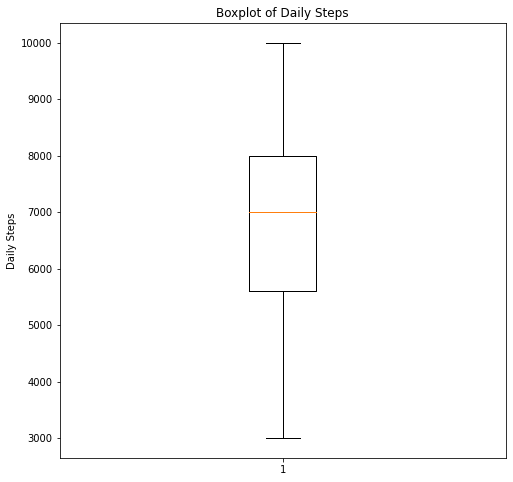

In [203]:
#Confirm whether we have outliers 
numeric_cols = health_wellness_df.select_dtypes('number')
for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(8,8))
    plt.boxplot(health_wellness_df[col])
    plt.ylabel(col)
    plt.title(f'Boxplot of {col}')
    plt.show;

**Observations**

* We observe outliers on the heart rate column

### 3b. Univariate Analysis
It involves examining a single variable (column) at a time to understand its distribution, central tendency, and spread

Gender
Male      189
Female    185
Name: count, dtype: int64


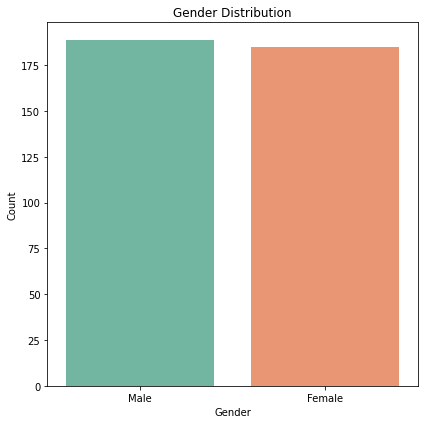

In [204]:
#Lets observe the gender distribution
gender_dist = health_wellness_df['Gender'].value_counts()
print(gender_dist)
#Plot the graph
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=gender_dist.index, y=gender_dist.values, palette="Set2", ax=ax)
ax.set_title("Gender Distribution")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

**Observations**

* We observe that most of the data was collected from the Male gender.

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


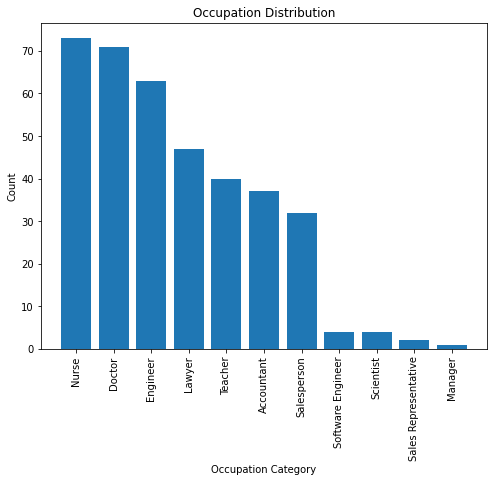

In [205]:
#Lets Observe the occupation distribution
occupation_dist = health_wellness_df['Occupation'].value_counts()
print(occupation_dist)

fig, ax = plt.subplots(figsize=(8,6))
plt.bar(occupation_dist.index, occupation_dist.values)
plt.title('Occupation Distribution')
plt.xlabel('Occupation Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show();

**Observations**

* The occupation with the highest entries here is Nurse, Doctor followed by Engineer's respectively. The occupation category Manager has the least entries.

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64


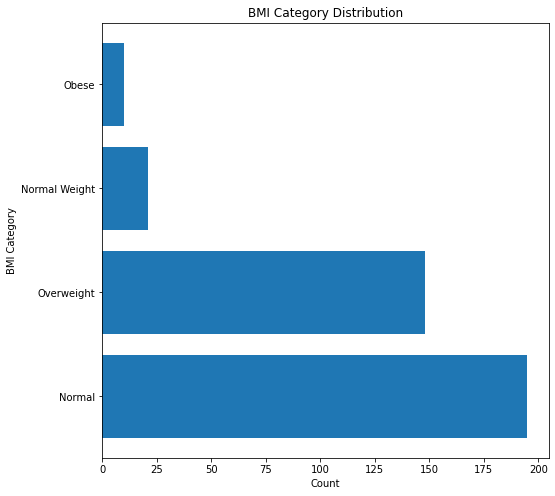

In [206]:
#BMI Category distribution
bmi_cat_dist = health_wellness_df['BMI Category'].value_counts()
print(bmi_cat_dist)
fig, ax = plt.subplots(figsize=(8,8))
plt.barh(bmi_cat_dist.index, bmi_cat_dist.values)
plt.ylabel('BMI Category')
plt.xlabel('Count')
plt.title('BMI Category Distribution')
plt.show();

**Observations**

* Most of the individuals that were measured were of normal BMI Category and followed by overweight individuals.

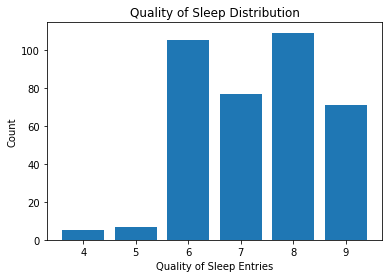

In [207]:
#Lets Observe the Quality of sleep distribution
quality_of_sleep = health_wellness_df['Quality of Sleep'].value_counts()
quality_of_sleep
plt.bar(quality_of_sleep.index, quality_of_sleep.values)
plt.xlabel('Quality of Sleep Entries')
plt.ylabel('Count')
plt.title('Quality of Sleep Distribution')
plt.show();

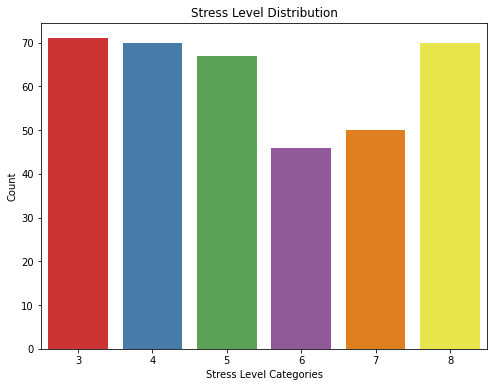

In [208]:
# Lets observe the Sress level distribution
stress_level_dist = health_wellness_df['Stress Level'].value_counts()
stress_level_dist
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=stress_level_dist.index, y=stress_level_dist.values, ax=ax, palette='Set1')
ax.set_ylabel('Count')
ax.set_xlabel('Stress Level Categories')
ax.set_title('Stress Level Distribution')
plt.show();

### 3c. Bivariate Analysis
This analysis examines the relationship between two variables. The independent variable that is the columns and the other dependent variable in this case Sleep Disorder.

   Gender Sleep Disorder  Count
0  Female       Insomnia     36
1  Female    No Disorder     82
2  Female    Sleep Apnea     67
3    Male       Insomnia     41
4    Male    No Disorder    137
5    Male    Sleep Apnea     11


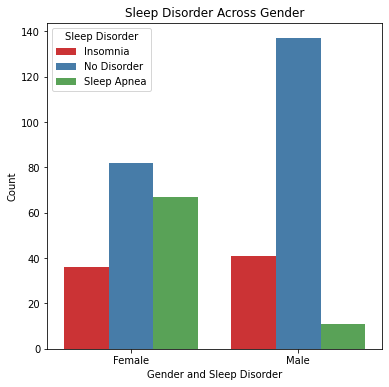

In [209]:
# Lets start with gender and sleep Disorder
gender_dis = health_wellness_df.groupby(['Gender', 'Sleep Disorder']).size().reset_index(name='Count')
print(gender_dis)
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(data=gender_dis, x='Gender', y='Count', hue='Sleep Disorder', ax=ax, palette='Set1')
ax.set_xlabel('Gender and Sleep Disorder')
ax.set_ylabel('Count')
ax.set_title('Sleep Disorder Across Gender')
plt.show();



**Observations**

* We observe that most Females suffer from Sleep Apnea while Males suffer from Insomnia.

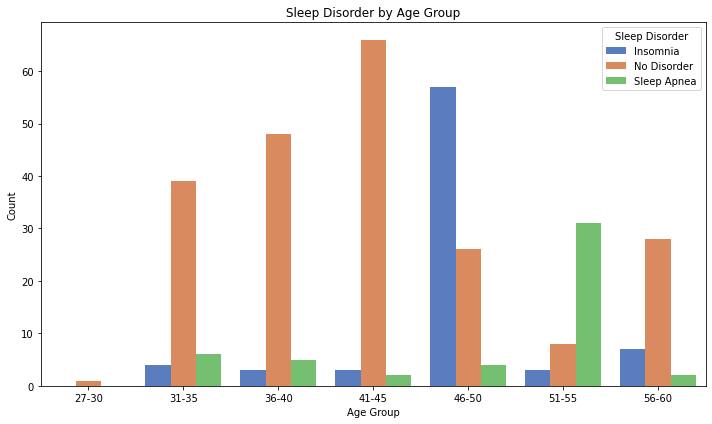

In [210]:
# Sleep disorder by Age 
health_wellness_df['Age Group'] = pd.cut(
    health_wellness_df['Age'],
    bins=[0, 27, 31, 36, 41, 46, 51, 56],
    labels=['27-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60']) #Create age groups

age_sleep = health_wellness_df.groupby(['Age Group', 'Sleep Disorder']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=age_sleep, x='Age Group', y='Count', hue='Sleep Disorder', palette='muted')
plt.title('Sleep Disorder by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Observations**

* Most of the people between 27 to 45 years old do not have any sleep disorder.

* Between 31-35 years, 36-40 and 41-45, most of the 31-35 year olds suffer from Sleep Apnea.

* Insomnia is high for the 46-50 year olds.

* Most of the people between 51-55 suffer from Sleep Apnea.

* 56-60 year olds suffer from Insomnia.

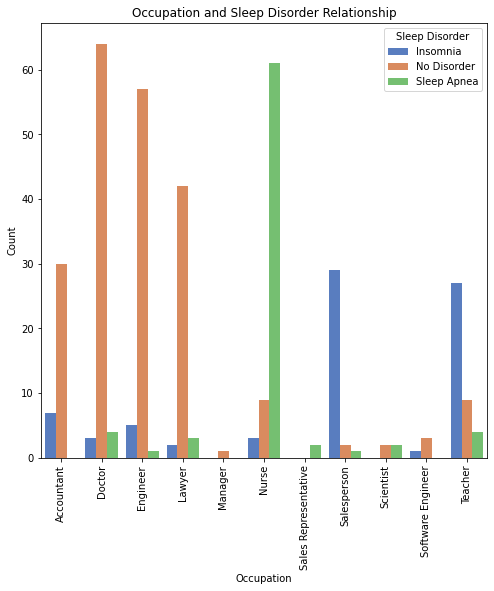

In [211]:
# Occupation and sleep disorder
occupation_dis = health_wellness_df.groupby(['Occupation', 'Sleep Disorder']).size().reset_index(name='Count')
occupation_dis
#Visualization to show this
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=occupation_dis, x='Occupation', y='Count', hue='Sleep Disorder', ax=ax, palette='muted')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Occupation and Sleep Disorder Relationship')
plt.savefig("plot_occupation.pdf", dpi=300)
plt.show()



**Observations**

* Amongst all the occupation the data was collected from Nurses seems to be more affected by Sleep Apnea while Salespersons affected by Insomnia followed by Teachers.


   Sleep Duration Sleep Disorder  Count
0         5.6-6.0       Insomnia      2
1         5.6-6.0    No Disorder     17
2         5.6-6.0    Sleep Apnea     18
3         6.1-6.5       Insomnia     44
4         6.1-6.5    No Disorder     22
5         6.1-6.5    Sleep Apnea     19
6         6.6-7.0       Insomnia     23
7         6.6-7.0    No Disorder      7
8         6.6-7.0    Sleep Apnea      3
9         7.1-7.5       Insomnia      4
10        7.1-7.5    No Disorder     71
11        7.1-7.5    Sleep Apnea      4
12        7.6-8.0       Insomnia      3
13        7.6-8.0    No Disorder     67
14        7.6-8.0    Sleep Apnea     12
15        8.1-8.5       Insomnia      1
16        8.1-8.5    No Disorder     35
17        8.1-8.5    Sleep Apnea     22


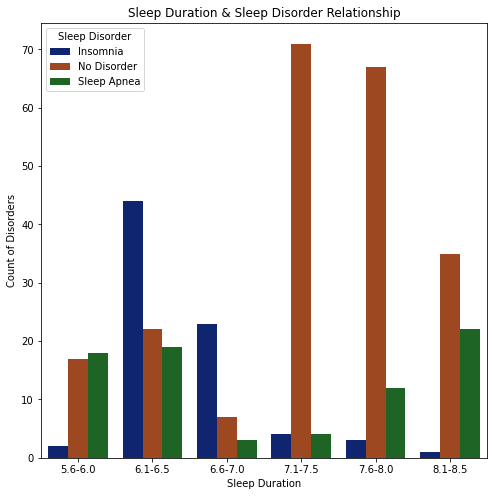

In [212]:
# Sleep Duration and Sleep Disorder
health_wellness_df['Sleep Duration'] = pd.cut(
    health_wellness_df['Sleep Duration'],
    bins = [0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5],
    labels = ['5.6-6.0', '6.1-6.5', '6.6-7.0', '7.1-7.5', '7.6-8.0', '8.1-8.5']
)
sleep_duration = health_wellness_df.groupby(['Sleep Duration', 'Sleep Disorder']).size().reset_index(name='Count')
print(sleep_duration)
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=sleep_duration, x='Sleep Duration', y='Count', hue='Sleep Disorder', ax=ax, palette='dark')
ax.set_xlabel('Sleep Duration')
ax.set_ylabel('Count of Disorders')
ax.set_title('Sleep Duration & Sleep Disorder Relationship')
plt.show();

**Observations**

* Those that have a sleep duration between 6.1-6.5 experience Insomnia while those that sleep for 8.1-8.5 hours suffer from Sleep Apnea.

    Quality of Sleep Sleep Disorder  Count
0                  4       Insomnia      1
1                  4    Sleep Apnea      4
2                  5       Insomnia      4
3                  5    Sleep Apnea      3
4                  6       Insomnia     32
5                  6    No Disorder     40
6                  6    Sleep Apnea     33
7                  7       Insomnia     34
8                  7    No Disorder     40
9                  7    Sleep Apnea      3
10                 8       Insomnia      5
11                 8    No Disorder    101
12                 8    Sleep Apnea      3
13                 9       Insomnia      1
14                 9    No Disorder     38
15                 9    Sleep Apnea     32


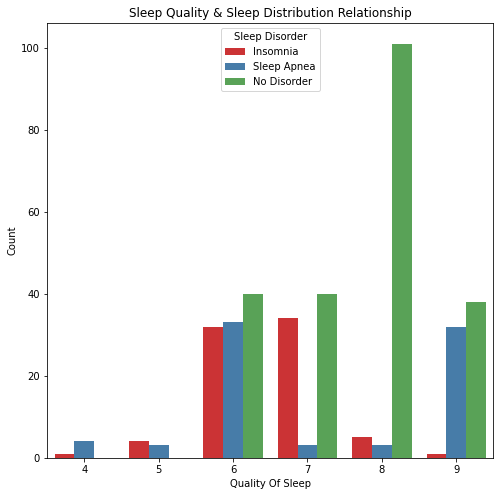

In [224]:
# Quality of sleep and sleep disorder
sleep_quality = health_wellness_df.groupby(['Quality of Sleep', 'Sleep Disorder']).size().reset_index(name='Count')
print(sleep_quality)
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=sleep_quality, x='Quality of Sleep', y='Count', hue='Sleep Disorder', ax=ax, palette='Set1')
ax.set_xlabel('Quality Of Sleep')
ax.set_ylabel('Count')
ax.set_title('Sleep Quality & Sleep Distribution Relationship')
plt.show();

**Observations**

* Those with sleep quality of 6 and 7 have the highest exposure to Insomnia.

* Quality of Sleep at 6 and 9 suffer from Sleep Apnea.

In [ ]:
# Physical Activity Level and Sleep Disorder


In [215]:
# Stress Level and Sleep Disorder

In [216]:
# BMI Category and Sleep Disorder

In [217]:
# Blood Pressure and Sleep Disorder

In [218]:
# Heart Rate and Sleep Disorder

In [219]:
# Daily Steps and Sleep Disorder

### 3d Multivariate Analysis
This looks at more than two variables simultaneously, helping you discover complex patterns, interactions or combined effects.

In [220]:
(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

SyntaxError: invalid syntax (<ipython-input-220-526e4e19cd8e>, line 5)